In [10]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import pickle
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt

## Helper Functions

In [14]:
def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)    

# PPO parameter dependency

## clip (epsilon)

In [30]:
epsilons = [0.01, 0.1, 0.2, 0.5, 0.75]
stats = {}

for eps in epsilons:
    try:
        with open(f'results/PPO_LunarLander-v3-eps{eps}-stat.pkl', 'rb') as f:
            key = f'eps-{eps}'
            stats[key] = pickle.load(f)
    except FileNotFoundError:
        pass

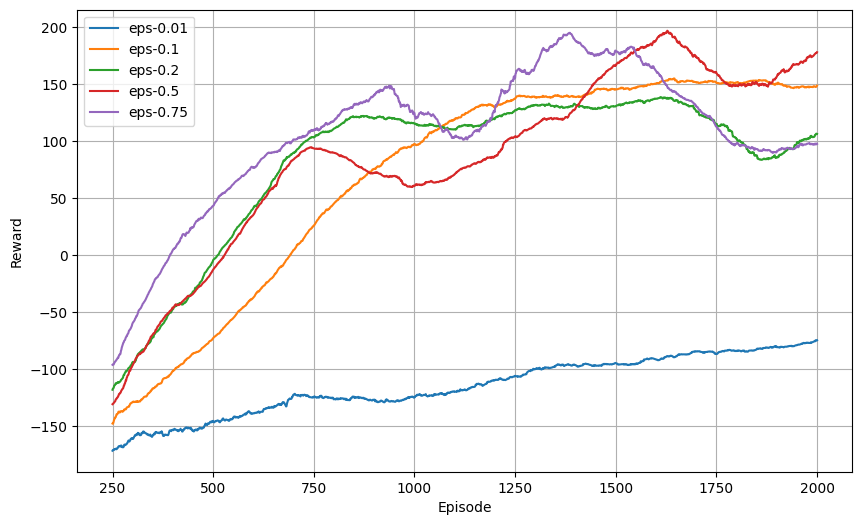

In [31]:
plt.figure(figsize=(10, 6))
for key, stat in stats.items():
    rewards = np.array(stat['rewards'])
    smoothed_rewards = running_mean(rewards, N=250)
    x = np.arange(250, 250 + len(smoothed_rewards))
    plt.plot(x, smoothed_rewards, label=key)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend()
plt.grid()
plt.show()

## restarts for eps=?

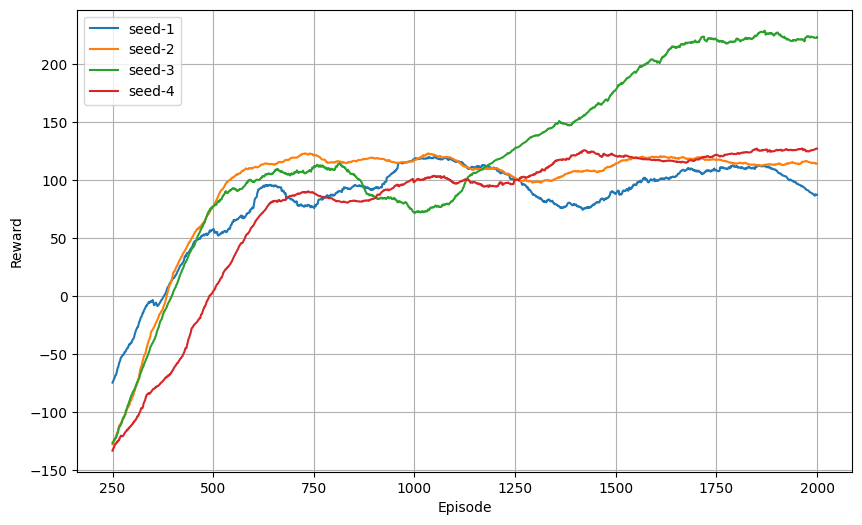

In [39]:
seeds = [1,2,3,4]
seed_stats = {}

for seed in seeds:
    try:
        with open(f'results/PPO_LunarLander-v3-eps{0.5}-seed{seed}-stat.pkl', 'rb') as f:
            key = f'seed-{seed}'
            seed_stats[key] = pickle.load(f)
    except FileNotFoundError:
        pass

plt.figure(figsize=(10, 6))
for key, stat in seed_stats.items():
    rewards = np.array(stat['rewards'])
    smoothed_rewards = running_mean(rewards, N=250)
    x = np.arange(250, 250 + len(smoothed_rewards))
    plt.plot(x, smoothed_rewards, label=key)
plt.xlabel('Episode')
plt.ylabel('Reward')
plt.legend()
plt.grid()
plt.show()